# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [6]:
import pandas as pd
import numpy
import scipy.stats
import matplotlib.pyplot as pyplot
import math
%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

Mean: 98.24923076923078
Standard Deviation: 0.7331831580389454


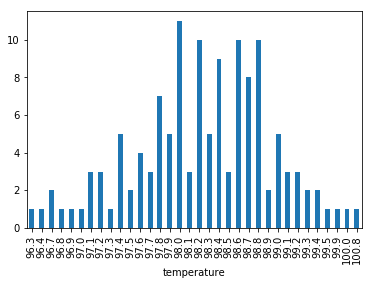

In [12]:
# Your work here.
# This cell shows the histogram as well as the statistics of our sample data

#print(df.temperature.value_counts().sort_index())
sample_mean = df.temperature.mean() #takes the mean of temperature for the sample
print('Mean: ' + str(df.temperature.mean()))
print('Standard Deviation: ' + str(df.temperature.std()))
df.groupby(['temperature']).size().plot(kind = 'bar')

#The below information was used to do a hypothesis test excluding the "extreme" data. The results did not differ and therefore
#this data isn't used for the results below.
#reduced = df[df.temperature > 96.9]
#reduced.temperature.mean()
#reduced.temperature.std()

1) The sample is fairly normally distributed. There is a clear maximum in the histogram near the sample mean with decaying tails. As is stated breifly above, there are some potential outliers in the high temperature and low temperature range (determined from temperatures that lie further than 2 standard deviations away from the mean), but these 'outliers' were found not to effect the results of the hypothesis test and are therefore included in the results.



In [8]:
len(df)  #This shows the number of samples

130

2) The sample size can be considered large because n = 130 which is greater than 30. The samples can also be considered independent because the body temperature of one person does not affect the body temperature of another. 

In [11]:
#This section calculates the standard deviation of the sampling distribution of the means.
sigma_xbar = (df.temperature.std())/math.sqrt(len(df))
print('std(sampling_distribution): ' + str(sigma_xbar))

std(sampling_distribution): 0.06430441683789101


In [19]:
# This section calculates the z-value for the sample.
#For a 5% significance level for a two tailed test, z-critical = 1.96. 
#If the sample z-value > z-critical, then reject Ho.

z_critical = 1.96 #This value can be changed depending on the desired significance level.
est_pop_mean = 98.6 #This value can be changed depending on the desired hypothesis test.

sample_z_value = abs(sample_mean - est_pop_mean) / sigma_xbar
print('z-sample: ' + str(sample_z_value))

if sample_z_value > z_critical:
    print('We will reject Ho and accept the alternative hypothesis. We have sufficient evidence to say that mean body temperature is not 98.6 degrees.')
else: 
    print('We do not have sufficient evidence to reject the null hypothesis, and therefore cannot say that the mean body temperature differs from 98.6 degrees.')
    

z-sample: 5.454823292364079
We will reject Ho and accept the alternative hypothesis. We have sufficient evidence to say that mean body temperature is not 98.6 degrees.


3) Ho: The population mean is 98.6 degrees.
   Ha: The population mean is NOT 98.6 degrees.
- In order to solve this problem we will use a one sample z-test. We can use the z test because our sample size is sufficiently large and approximately normally distributed. We should use a one sample test, because we are investigating the effects of one experiment (aka one set of data).

- If we assume a significance level of 5%, this results in a critical z value of 1.96. What we find is that our sample mean of 98.249 results in a z-value of 5.48, which is a much more extreme result than our critical value, meaning that it is unlikely that the results of our sample happened by chance. This leads me to reject the null hypothesis and state that the true population mean of body temperature is not 98.6 degrees.

- If we were to use a t-statistic instead, we would see that for a two tailed test, the t-critical value, for a sample with DOF = 129 (approximately 100) and a significance level of 5% is 1.98. This value is not significantly different than our z-critical value and therefore our results will not change.

- If we incorrectly used a two sample test, we would see that we only have one type of sample and we wouldn't really have anything to compare. We could split our data set in 2 and find two seperate sample means and standard deviations, but that doesn't really make sense to do.

4) Because we rejected our null hypothesis that the mean body temperature is 98.6 degrees, and have not been given the information necessary to determine the true population mean, I will proceed with this problem again assuming that the true population mean is 98.6 degrees. 

-I will construct a 95% confidence interval to show the "normal" body temperatures. Again our critical z-value for 95% confidence is z = 1.96. Using a standard deviation of the sampling mean of 0.064 degrees (found from estimating the population standard deviation as the sample standard deviation and dividing by sqrt(n)), I find that we can be confident that 95% of the population will have body temperatures between 98.47 and 98.72 degrees. Any temperature outside this range can be considered abnormal.

In [26]:
# This cell will contruct a 95% confidence interval for normal body temperatures.

z = 1.96
low_normal = sample_mean - 1.96*sigma_xbar
high_normal = sample_mean + 1.96*sigma_xbar
change = round(1.96*sigma_xbar, 3)

print('Normal body temperature is within ' + str(change) + ' degrees of the true population mean.')


Normal body temperature is within 0.126 degrees of the true population mean.


5) To determine whether there is a body temperature difference for males and females I will use the difference of means to conduct my test. My null hypothesis will be that there is no difference in mean body temperature. My alternative hypothesis is that there is a difference in mean body temperature. I will be looking at a 5% significance level. Below are the statistics for the sample data.

In [27]:
#This cell splits the data into female and male and prints out the mean and standard deviation for each sample category.
female = df[df.gender == 'F']
print('Number of Females: ' + str(len(female)))
mean_female = female.temperature.mean()
std_female = female.temperature.std()
print('Female, mean: ' + str(female.temperature.mean()))
print('Female, std: ' + str(female.temperature.std()))
male = df[df.gender == 'M']
mean_male = male.temperature.mean()
std_male = male.temperature.std()
print('Number of Males: ' + str(len(male)))
print('Male, mean: ' + str(male.temperature.mean()))
print('Male, std: ' + str(male.temperature.std()))

Number of Females: 65
Female, mean: 98.39384615384613
Female, std: 0.7434877527313665
Number of Males: 65
Male, mean: 98.1046153846154
Male, std: 0.6987557623265908


-In order to determine whether there is a statistically significant difference in means, I will assume that the null hypothesis is true. Because I am only interested in whether the mean temperatures are diffent or the same I will be using a two tailed z-test. The critical z-value for a 5% significance is 1.96. We know that for the difference of means, the standard deviation of the sampling distribution of sample mean differences can be found from the following equation,

                                Sigma_x-y = sqrt(s_x^2/n + s_y^2/m) 
                                
where n and m are the number of samples (in this case 65). s_x is the standard deviation of females, which was found to be 0.74, and s_y is the standard deviation of males, which was found to be 0.69. From this information Sigma_x-y is found to be 0.126 degrees. The actual difference of means of our sample is 0.289 degrees, which results in a z-value of 2.29. 


In [31]:
#Ho: The difference in means equals 0. Ha: The difference in means does not equal 0.
# Assume the null hypotheis is true. I will use a 5% significance level

sample_diff_means = mean_female - mean_male
z_critical = 1.96 #This value can be changed depending on the desired significance level.
est_pop_diff_mean = 0 #This value can be changed depending on the desired hypothesis test.

sigma_xbar_diff = math.sqrt((std_female**2 + std_male**2)/len(female))
print('std(sampling_distribution): ' + str(sigma_xbar_diff))

sample_diff_z_value = abs(sample_diff_means - est_pop_diff_mean) / sigma_xbar_diff
print('z-sample: ' + str(sample_diff_z_value))

if sample_diff_z_value > z_critical:
    print('We will reject Ho and accept the alternative hypothesis. We have sufficient evidence to say that mean body temperature differs between men and women.')
else: 
    print('We do not have sufficient evidence to reject the null hypothesis, and therefore cannot say that the mean body temperature differs between men and women.')
    

std(sampling_distribution): 0.12655395041982642
z-sample: 2.285434538165274
We will reject Ho and accept the alternative hypothesis. We have sufficient evidence to say that mean body temperature differs between men and women.


**Conclusion: Because our sample data for difference in male/female body temperature lies outside our 95% significance level, our results likely did not occur by chance. This means that we should reject our null hypothesis and we can say that there is a statistically significant difference in the mean body temperature of men and women.**